# Cleansing and Processing

In [315]:
import numpy as np
import pandas as pd

In [316]:
NASA_df = pd.read_csv('Data/NASA.csv')

In [317]:
NASA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        199 non-null    int64  
 1   text                           197 non-null    object 
 2   post_text                      189 non-null    object 
 3   shared_text                    42 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           199 non-null    object 
 6   timestamp                      199 non-null    int64  
 7   image                          84 non-null     object 
 8   image_lowquality               199 non-null    object 
 9   images                         199 non-null    object 
 10  images_description             199 non-null    object 
 11  images_lowquality              199 non-null    object 
 12  images_lowquality_description  199 non-null    obj

In [318]:
NASA_df2 = pd.read_csv("Data/NASA2.csv")

In [319]:
NASA_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   original_request_url           338 non-null    object 
 1   post_url                       338 non-null    object 
 2   post_id                        338 non-null    object 
 3   text                           338 non-null    object 
 4   post_text                      323 non-null    object 
 5   shared_text                    98 non-null     object 
 6   original_text                  1 non-null      object 
 7   time                           338 non-null    object 
 8   timestamp                      333 non-null    float64
 9   image                          134 non-null    object 
 10  image_lowquality               338 non-null    object 
 11  images                         338 non-null    object 
 12  images_description             338 non-null    obj

In [320]:
useful = ['post_url','text', 'time', 'comments', 'shares', 'link', 'links', 'username', 'comments_full',
          'reactions', 'reaction_count', 'was_live']
NASA_final_df = NASA_df2[useful]
NASA_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_url        338 non-null    object 
 1   text            338 non-null    object 
 2   time            338 non-null    object 
 3   comments        336 non-null    float64
 4   shares          338 non-null    int64  
 5   link            312 non-null    object 
 6   links           338 non-null    object 
 7   username        338 non-null    object 
 8   comments_full   338 non-null    object 
 9   reactions       338 non-null    object 
 10  reaction_count  338 non-null    int64  
 11  was_live        336 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 31.8+ KB


In [321]:
NASA_final_df['time'] = pd.to_datetime(NASA_final_df['time'])
NASA_final_df['date'] = NASA_final_df['time'].dt.date
NASA_final_df['hours'] = NASA_final_df['time'].dt.hour

C:\Users\Admin\AppData\Local\Temp\ipykernel_9464\1176000566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['time'] = pd.to_datetime(NASA_final_df['time'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9464\1176000566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['date'] = NASA_final_df['time'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_9464\1176000566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [322]:
NASA_final_df.duplicated().sum()

0

In [323]:
NASA_final_df.isnull().sum()

post_url           0
text               0
time               0
comments           2
shares             0
link              26
links              0
username           0
comments_full      0
reactions          0
reaction_count     0
was_live           2
date               0
hours              0
dtype: int64

In [324]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(79, 14)

In [325]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)
NASA_final_df = NASA_final_df.fillna(NASA_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9464\3148922942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)


In [326]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].fillna('[]')
NASA_final_df['comments_full'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: comments_full
Non-Null Count  Dtype 
--------------  ----- 
338 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [327]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(125, 14)

In [328]:
NASA_final_df['comments'] = NASA_final_df['comments'].fillna(0)
NASA_final_df['link'] = NASA_final_df['link'].fillna('')

In [329]:
NASA_final_df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: time
Non-Null Count  Dtype         
--------------  -----         
338 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 KB


In [330]:
NASA_final_df.to_csv('Data/NASA_final.csv',index=False)

# Analysis
## Basic analysis

In [331]:
NASA = NASA_final_df
NASA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_url        338 non-null    object        
 1   text            338 non-null    object        
 2   time            338 non-null    datetime64[ns]
 3   comments        338 non-null    float64       
 4   shares          338 non-null    int64         
 5   link            338 non-null    object        
 6   links           338 non-null    object        
 7   username        338 non-null    object        
 8   comments_full   338 non-null    object        
 9   reactions       338 non-null    object        
 10  reaction_count  338 non-null    int64         
 11  was_live        337 non-null    object        
 12  date            338 non-null    object        
 13  hours           338 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memo

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
NASA.describe()

comments        shares  reaction_count       hours
count    338.000000    338.000000      338.000000  338.000000
mean     480.310651   1251.360947     6219.286982    9.133136
std     1105.158689   5660.011863    16813.212399    8.915530
min        0.000000      0.000000      366.000000    0.000000
25%      141.250000    167.000000     1576.000000    2.000000
50%      234.500000    285.000000     2667.500000    4.000000
75%      393.250000    568.750000     5099.750000   21.000000
max    13538.000000  63257.000000   202242.000000   23.000000

In [334]:
date_related = NASA[['date', 'comments', 'shares', 'reaction_count']]
date_related = pd.DataFrame(date_related.groupby(['date']).sum())
date_related

comments  shares  reaction_count
date                                        
2023-05-13     611.0     693            7890
2023-05-15     171.0     250            2437
2023-05-16     280.0     222            2218
2023-05-17    1602.0     710            5590
2023-05-18     406.0     337            4258
...              ...     ...             ...
2023-11-21     731.0    1780           10285
2023-11-22     708.0     738            6454
2023-11-23    1370.0     464            6206
2023-11-24     148.0     169            1082
2023-11-25      92.0     160             764

[163 rows x 3 columns]

### Looking at the distributions

In [335]:
# The beginning and the end of all the date
begin_date = date_related.index[0]
end_date = date_related.index[-1]

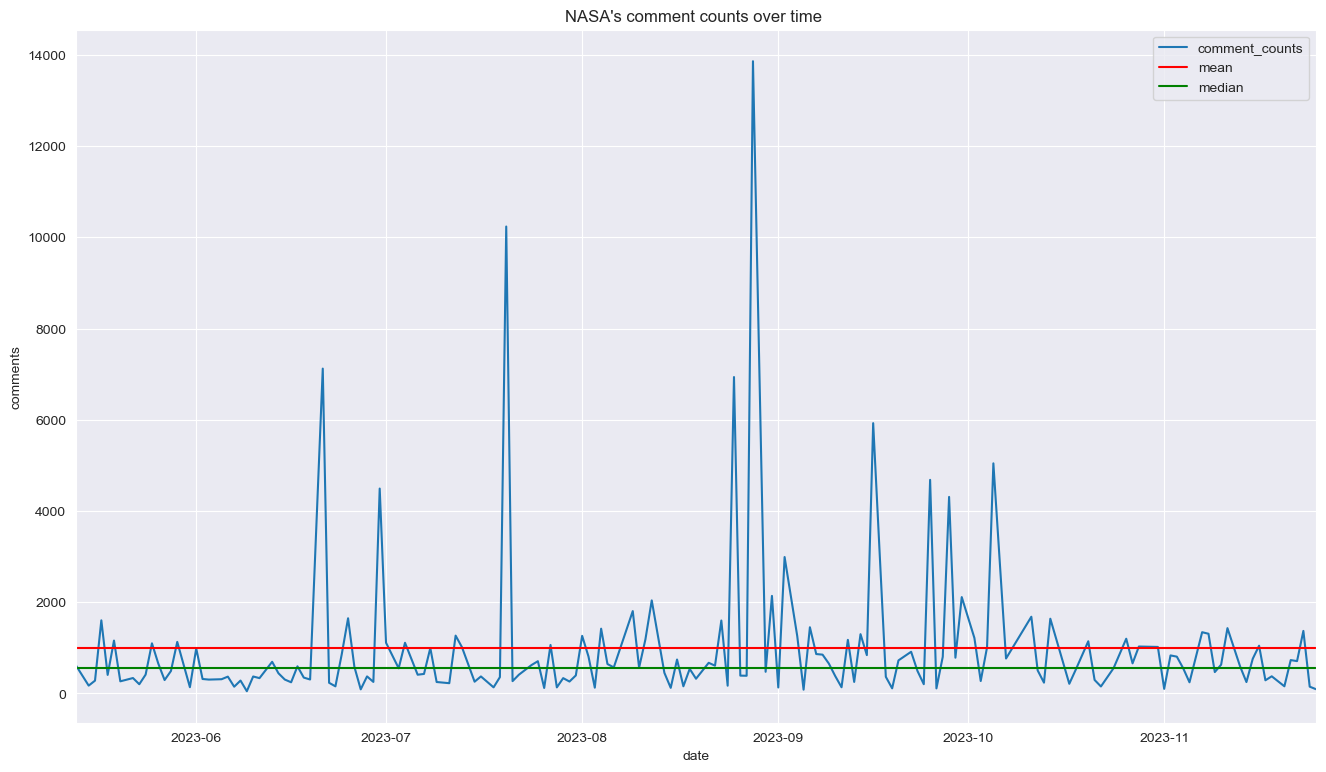

In [336]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['comments'], ax = ax)

mean_comment = date_related['comments'].mean()
med_comment = date_related['comments'].median()

plt.axhline(y=mean_comment, color='red')
plt.axhline(y=med_comment, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s comment counts over time ')
plt.legend(labels=['comment_counts', 'mean', 'median'])

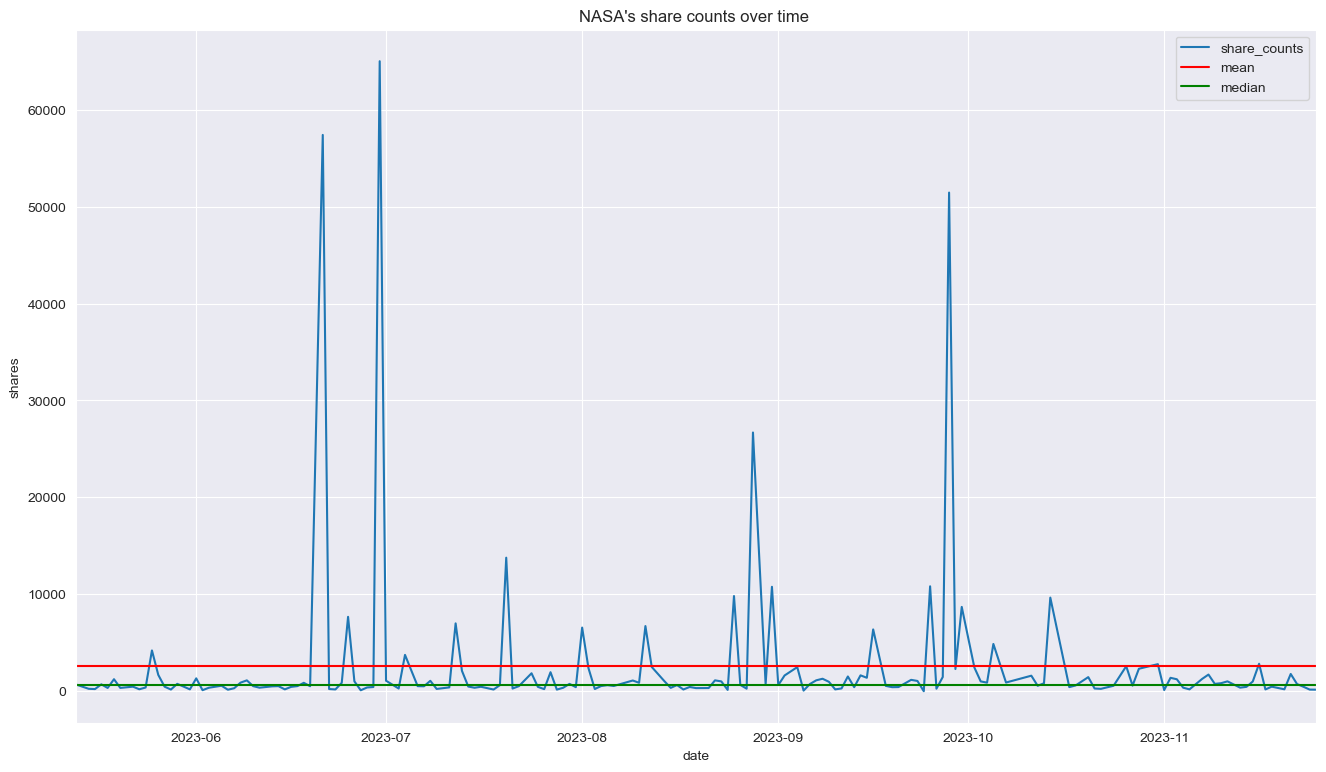

In [337]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['shares'], ax = ax)

mean_share = date_related['shares'].mean()
med_share = date_related['shares'].median()

plt.axhline(y=mean_share, color='red')
plt.axhline(y=med_share, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s share counts over time ')
plt.legend(labels=['share_counts', 'mean', 'median'])

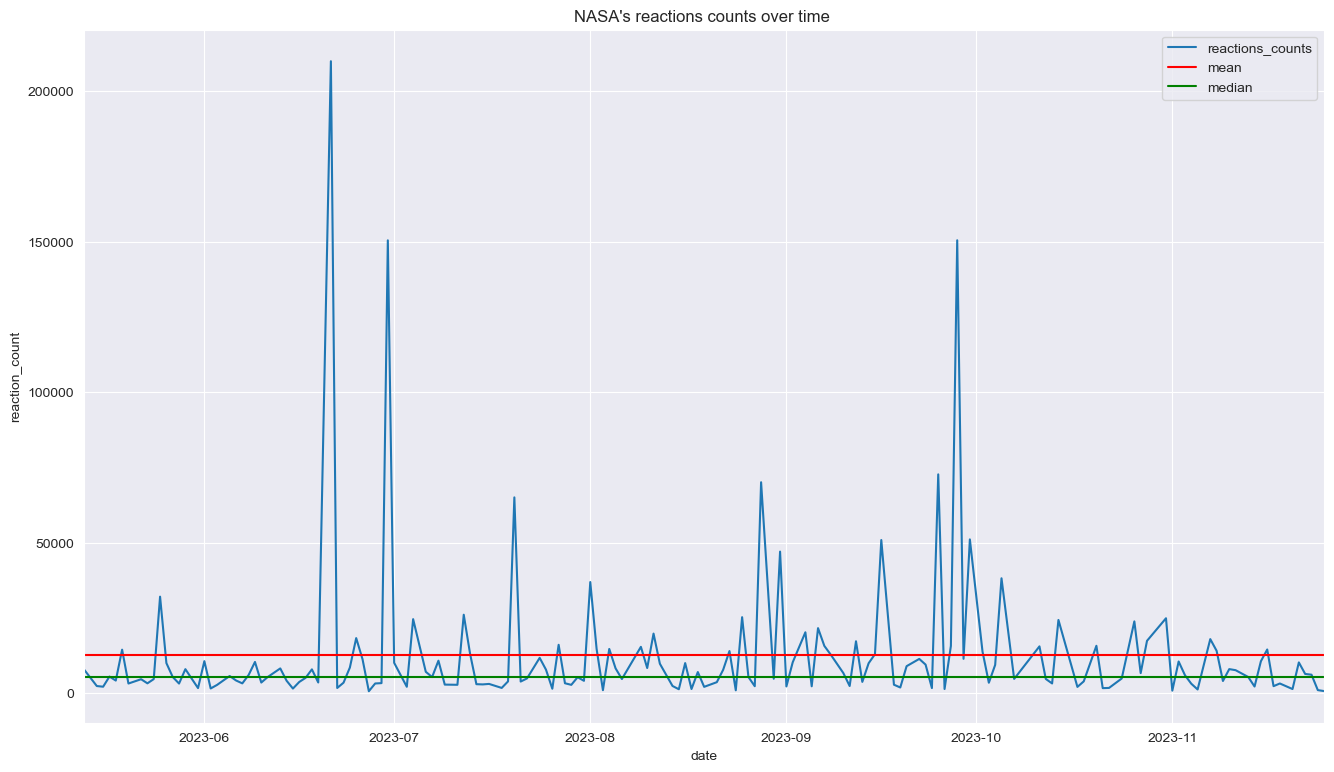

In [338]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=date_related['reaction_count'], ax = ax)
plt.legend(labels=['reaction_count'])

mean_reacts = date_related['reaction_count'].mean()
med_reacts = date_related['reaction_count'].median()

plt.axhline(y=mean_reacts, color='red')
plt.axhline(y=med_reacts, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s reactions counts over time ')
plt.legend(labels=['reactions_counts', 'mean', 'median'])

### Finding and analyze the outlier

In [339]:
# find outlier
outlier_comment = date_related[date_related['comments'] > mean_comment + 2 * date_related['comments'].std()]
outlier_comment

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-07-20   10236.0   13777           65103
2023-08-25    6936.0    9821           25310
2023-08-28   13860.0   26693           70133
2023-09-16    5925.0    6378           50939
2023-09-25    4682.0   10824           72748
2023-10-05    5044.0    4877           38231

In [340]:
# Find all the posts in all the days that have sudden grow of numbers
outlier_posts_comment = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_comment.index))]
outlier_posts_comment.head()

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
71   https://facebook.com/story.php?story_fbid=1324...   
77   https://facebook.com/story.php?story_fbid=1115...   
82   https://m.facebook.com/NASA/posts/860674359085886   
83   https://m.facebook.com/NASA/posts/999840931284213   
97   https://facebook.com/story.php?story_fbid=1031...   
99   https://facebook.com/story.php?story_fbid=pfbi...   
100  https://m.facebook.com/NASA/posts/338299975321523   
101  https://facebook.com/story.php?story_fbid=pfbi...   
102  https://facebook.com/story.php?story_fbid=6309...   
115  https://facebook.com/story.php?story_fbid=pfbi...   
116  https://facebook.com/story.php?story_fbid=pfbi...   
117  https://facebook.com/story.php?story_fbid=pfbi...   
118  https://facebook.com/story.php?story_fbid=pfbi...   
119             https://m.facebook.com/866023014893076   
120  https://m.facebook.com/NASA/posts/176446333399...   
121  https://facebook.com/story.php?story_fbid=pfbi...   
158  https://facebook.com/story.php?story_fbid=pfbi...   
159  https://m.facebook.com/NASA/posts/257401430535836   
162  https://facebook.com/story.php?story_fbid=2581...   
164  https://facebook.com/story.php?story_fbid=pfbi...   
165  https://m.facebook.com/NASA/posts/159616637168809   
166  https://facebook.com/story.php?story_fbid=pfbi...   
224  https://facebook.com/story.php?story_fbid=pfbi...   
225  https://facebook.com/story.php?story_fbid=pfbi...   
254  https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
258  https://facebook.com/story.php?story_fbid=pfbi...   
271  https://facebook.com/story.php?story_fbid=pfbi...   
272  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
71   Watch the Psyche spacecraft launch from NASA’s... 2023-10-05 21:57:35   
77   Watch as the first asteroid sample collected i... 2023-10-05 03:28:27   
82   FRI, 13 OCT\nPsyche Launches to a Metal Astero... 2023-10-05 22:06:52   
83   WED, 11 OCT\nRevealing the OSIRIS-REx Asteroid... 2023-10-05 05:43:17   
97   On Sunday, Sept. 24, 2023, NASA’s OSIRIS-REx s... 2023-09-25 21:16:43   
99   We're only a few weeks away from the "ring of ... 2023-09-25 23:25:37   
100  TUES, 26 SEP\nNASA Science Live: Ask Your Ques... 2023-09-25 21:18:33   
101  Today's OSIRIS-REx asteroid sample landing isn... 2023-09-25 06:07:16   
102  Watch a spacecraft deliver an asteroid sample ... 2023-09-16 03:20:11   
115  Frank Rubio breaks the record for the longest ... 2023-09-16 21:40:01   
116  As we celebrate the start of #HHM23, Frank Rub... 2023-09-16 05:53:32   
117  As we celebrate the start of #HHM23, Frank Rub... 2023-09-16 06:00:21   
118  #OSIRISREx is set to return an asteroid sample... 2023-09-16 05:15:09   
119  NASA - National Aeronautics and Space Administ... 2023-09-16 00:00:00   
120  SUN, 24 SEP\nOSIRIS-REx Asteroid Sample Return... 2023-09-16 03:21:42   
121  We’re celebrating the start of Hispanic Herita... 2023-09-16 01:27:06   
158  Save the date for a solar eclipse: On Oct. 14,... 2023-08-28 21:26:43   
159  SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So... 2023-08-28 21:30:20   
162  Watch live with us as a crew of four launch on... 2023-08-25 10:10:52   
164  Update: The #Crew7 launch to the International... 2023-08-25 10:14:33   
165  SAT, 26 AUG\nNASA's SpaceX Crew-7 Launch (Offi... 2023-08-25 10:14:01   
166  From: space\nTo: your school, library, or muse... 2023-08-25 02:17:57   
224  One small step.\n\nOn this day 54 years ago, A... 2023-07-20 23:49:38   
225  A total eclipse will sweep across North Americ... 2023-07-20 21:04:58   
254  Say hi to the sky in July!\n\nA full moon star... 2023-06-30 03:14:58   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
258  

In [341]:
outlier_posts_comment['date'].value_counts()

2023-09-16    8
2023-10-05    4
2023-09-25    4
2023-08-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-07-20    2
Name: date, dtype: int64

In [342]:
outlier_posts_comment[outlier_posts_comment['comments'] > mean_comment]

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
71   https://facebook.com/story.php?story_fbid=1324...   
77   https://facebook.com/story.php?story_fbid=1115...   
101  https://facebook.com/story.php?story_fbid=pfbi...   
102  https://facebook.com/story.php?story_fbid=6309...   
162  https://facebook.com/story.php?story_fbid=2581...   
166  https://facebook.com/story.php?story_fbid=pfbi...   
224  https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
71   Watch the Psyche spacecraft launch from NASA’s... 2023-10-05 21:57:35   
77   Watch as the first asteroid sample collected i... 2023-10-05 03:28:27   
101  Today's OSIRIS-REx asteroid sample landing isn... 2023-09-25 06:07:16   
102  Watch a spacecraft deliver an asteroid sample ... 2023-09-16 03:20:11   
162  Watch live with us as a crew of four launch on... 2023-08-25 10:10:52   
166  From: space\nTo: your school, library, or muse... 2023-08-25 02:17:57   
224  One small step.\n\nOn this day 54 years ago, A... 2023-07-20 23:49:38   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
71     2752.0    2686  https://spaceplace.nasa.gov/psyche-launch-bing...   
77     1901.0    2144  https://science.nasa.gov/mission/osiris-rex/?f...   
101    2945.0    4508  http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...   
102    4166.0    4987  https://www.nasa.gov/feature/goddard/2022/surp...   
162    2638.0    1419  https://www.nasa.gov/feature/what-you-need-to-...   
166    3975.0    8081  https://go.nasa.gov/47FLQLD?fbclid=IwAR0Gd3-eM...   
224   10182.0   13642  http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
71                                                  []   
77   [{'link': 'https://lm.facebook.com/l.php?u=htt...   
101  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
102                                                 []   
162  [{'link': '/hashtag/crew7?refid=52&__tn__=%2As...   
166  [{'link': '/hashtag/moontree?__tn__=%2As-R&pai...   
224  [{'link': '/NASAArtemis?eav=AfauJfqCy-haYR0SZ-...   
256  [{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...   
274  [{'link': '/chandraxrayobservatory?eav=AfZe37J...   

                                              username comments_full  \
67   NASA - National Aeronautics and Space Administ...            []   
71   NASA - National Aeronautics and Space Administ...            []   
77   NASA - National Aeronautics and Space Administ...            []   
101  NASA - National Aeronautics and Space Administ...            []   
102  NASA - National Aeronautics and Space Administ...            []   
162  NASA - National Aeronautics and Space Administ...            []   
166  NASA - National Aeronautics and Space Administ...            []   
224  NASA - National Aeronautics and Space Administ...            []   
256  NASA - National Aeronautics and Space Administ...            []   
274  NASA - National Aeronautics and Space Administ...            []   

                                             reactions  reaction_count  \
67   {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
71   {'like': 12946, 'love': 3944, 'haha': 108, 'wo...           17320   
77   {'like': 12077, 'love': 3344, 'haha': 145, 'wo...   

In [343]:
# find outlier
outlier_share = date_related[date_related['shares'] > mean_share + 2 * date_related['shares'].std()]
outlier_share

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-08-28   13860.0   26693           70133
2023-09-28    4308.0   51446          150505

In [344]:
outlier_posts_share = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_share.index))]
outlier_posts_share.head()

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
94   https://facebook.com/story.php?story_fbid=pfbi...   
95   https://facebook.com/story.php?story_fbid=pfbi...   
158  https://facebook.com/story.php?story_fbid=pfbi...   
159  https://m.facebook.com/NASA/posts/257401430535836   
254  https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
258  https://facebook.com/story.php?story_fbid=pfbi...   
271  https://facebook.com/story.php?story_fbid=pfbi...   
272  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
94   Carolina Rudisel would have never imagined she... 2023-09-28 03:26:21   
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
158  Save the date for a solar eclipse: On Oct. 14,... 2023-08-28 21:26:43   
159  SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So... 2023-08-28 21:30:20   
254  Say hi to the sky in July!\n\nA full moon star... 2023-06-30 03:14:58   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
258  Galaxies aren't randomly scattered throughout ... 2023-06-30 00:54:59   
271  Are there earthquakes on other planets? There ... 2023-06-21 03:52:44   
272  Oh, those summer nights! It's the #SummerSolst... 2023-06-21 22:16:38   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
94        1.0      28  https://www.nasa.gov/faces-of-nasa/carolina-ru...   
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
158     247.0     617                          https://fb.me/e/8oN0ufeG6   
159      75.0       0  https://media1.tenor.co/m/_zTvAtDWeEMAAAAd/gol...   
254     194.0    1085  http://go.nasa.gov/whatsup?fbclid=IwAR1NvN2XMl...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
258     361.0     656  https://go.nasa.gov/3PCFRR5?fbclid=IwAR1Riw5bR...   
271     154.0     168  https://go.nasa.gov/3N68hP1?fbclid=IwAR04h0J8h...   
272     233.0    1279  https://go.nasa.gov/42QYJP5?fbclid=IwAR2yo3F7-...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
94   [{'link': 'https://lm.facebook.com/l.php?u=htt...   
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
158  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
159  [{'link': '/events/feed/watch/?feed_data%5Brep...   
254  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
256  [{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...   
258  [{'link': '/NASAWebb?eav=AfYYNGkq0svr_wowRuh-W...   
271  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
272  [{'link': '/hashtag/summersolstice?__tn__=%2As...   
274  [{'link': '/chandraxrayobservatory?eav=AfZe37J...   

                                              username  \
67   NASA - National Aeronautics and Space Administ...   
94   NASA - National Aeronautics and Space Administ...   
95   NASA - National Aeronautics and Space Administ...   
158  NASA - National Aeronautics and Space Administ...   
159  NASA - National Aeronautics and Space Administ...   
254  NASA - National Aeronautics and Space Administ...   
256  NASA - National Aeronautics and Space Administ...   
258  NASA - National Aeronautics and Space Administ...   
271  NASA - National Aeronautics and Space Administ...   
272  NASA - National Aeronautics and Space Administ...   
274  NASA - National Aeronautics and Space Administ...   

                                         comments_full  \
67                                             

In [345]:
outlier_posts_share['date'].value_counts()

2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
Name: date, dtype: int64

In [346]:
outlier_posts_share[outlier_posts_share['shares'] > mean_share]
# Cosmology event

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
95   https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
256  [{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...   
274  [{'link': '/chandraxrayobservatory?eav=AfZe37J...   

                                              username comments_full  \
67   NASA - National Aeronautics and Space Administ...            []   
95   NASA - National Aeronautics and Space Administ...            []   
256  NASA - National Aeronautics and Space Administ...            []   
274  NASA - National Aeronautics and Space Administ...            []   

                                             reactions  reaction_count  \
67   {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
95   {'like': 55254, 'love': 86757, 'haha': 560, 'w...          149673   
256  {'like': 38336, 'love': 93026, 'haha': 285, 'w...          136631   
274  {'like': 76402, 'love': 94196, 'haha': 1086, '...          202242   

    was_live        date  hours  
67      True  2023-08-28     21  
95     False  2023-09-28      1  
256    False  2023-06-30     23  
274    False  2023-06-21      3

In [347]:
outlier_reaction = date_related[date_related['reaction_count'] > mean_reacts + 2 * date_related['reaction_count'].std()]
outlier_reaction

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-07-20   10236.0   13777           65103
2023-08-28   13860.0   26693           70133
2023-09-25    4682.0   10824           72748
2023-09-28    4308.0   51446          150505

In [348]:
outlier_posts_reactions = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_reaction.index)) ]
outlier_posts_reactions.head()

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
94   https://facebook.com/story.php?story_fbid=pfbi...   
95   https://facebook.com/story.php?story_fbid=pfbi...   
97   https://facebook.com/story.php?story_fbid=1031...   
99   https://facebook.com/story.php?story_fbid=pfbi...   
100  https://m.facebook.com/NASA/posts/338299975321523   
101  https://facebook.com/story.php?story_fbid=pfbi...   
158  https://facebook.com/story.php?story_fbid=pfbi...   
159  https://m.facebook.com/NASA/posts/257401430535836   
224  https://facebook.com/story.php?story_fbid=pfbi...   
225  https://facebook.com/story.php?story_fbid=pfbi...   
254  https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
258  https://facebook.com/story.php?story_fbid=pfbi...   
271  https://facebook.com/story.php?story_fbid=pfbi...   
272  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
94   Carolina Rudisel would have never imagined she... 2023-09-28 03:26:21   
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
97   On Sunday, Sept. 24, 2023, NASA’s OSIRIS-REx s... 2023-09-25 21:16:43   
99   We're only a few weeks away from the "ring of ... 2023-09-25 23:25:37   
100  TUES, 26 SEP\nNASA Science Live: Ask Your Ques... 2023-09-25 21:18:33   
101  Today's OSIRIS-REx asteroid sample landing isn... 2023-09-25 06:07:16   
158  Save the date for a solar eclipse: On Oct. 14,... 2023-08-28 21:26:43   
159  SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So... 2023-08-28 21:30:20   
224  One small step.\n\nOn this day 54 years ago, A... 2023-07-20 23:49:38   
225  A total eclipse will sweep across North Americ... 2023-07-20 21:04:58   
254  Say hi to the sky in July!\n\nA full moon star... 2023-06-30 03:14:58   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
258  Galaxies aren't randomly scattered throughout ... 2023-06-30 00:54:59   
271  Are there earthquakes on other planets? There ... 2023-06-21 03:52:44   
272  Oh, those summer nights! It's the #SummerSolst... 2023-06-21 22:16:38   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
94        1.0      28  https://www.nasa.gov/faces-of-nasa/carolina-ru...   
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
97      662.0     366  https://blogs.nasa.gov/osiris-rex?fbclid=IwAR2...   
99      932.0    5950  https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...   
100     143.0       0  http://nasa.gov/subscribe?fbclid=IwAR3s8YkXkUh...   
101    2945.0    4508  http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...   
158     247.0     617                          https://fb.me/e/8oN0ufeG6   
159      75.0       0  https://media1.tenor.co/m/_zTvAtDWeEMAAAAd/gol...   
224   10182.0   13642  http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...   
225      54.0     135  https://go.nasa.gov/43CDlO2?fbclid=IwAR0J66oqX...   
254     194.0    1085  http://go.nasa.gov/whatsup?fbclid=IwAR1NvN2XMl...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
258     361.0     656  https://go.nasa.gov/3PCFRR5?fbclid=IwAR1Riw5bR...   
271     154.0     168  https://go.nasa.gov/3N68hP1?fbclid=IwAR04h0J8h...   
272     233.0    1279  https://go.nasa.gov/42QYJP5?fbclid=IwAR2yo3F7-...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
94   [{'link': 'https://lm.facebook.com/l.php?u=htt...   
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3..

In [349]:
outlier_posts_reactions['date'].value_counts()

2023-09-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
2023-07-20    2
Name: date, dtype: int64

In [350]:
outlier_posts_reactions[outlier_posts_reactions['shares'] > mean_share]
#Cosmology event

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
95   https://facebook.com/story.php?story_fbid=pfbi...   
99   https://facebook.com/story.php?story_fbid=pfbi...   
101  https://facebook.com/story.php?story_fbid=pfbi...   
224  https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
99   We're only a few weeks away from the "ring of ... 2023-09-25 23:25:37   
101  Today's OSIRIS-REx asteroid sample landing isn... 2023-09-25 06:07:16   
224  One small step.\n\nOn this day 54 years ago, A... 2023-07-20 23:49:38   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
99      932.0    5950  https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...   
101    2945.0    4508  http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...   
224   10182.0   13642  http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
99   [{'link': 'https://lm.facebook.com/l.php?u=htt...   
101  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
224  [{'link': '/NASAArtemis?eav=AfauJfqCy-haYR0SZ-...   
256  [{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...   
274  [{'link': '/chandraxrayobservatory?eav=AfZe37J...   

                                              username comments_full  \
67   NASA - National Aeronautics and Space Administ...            []   
95   NASA - National Aeronautics and Space Administ...            []   
99   NASA - National Aeronautics and Space Administ...            []   
101  NASA - National Aeronautics and Space Administ...            []   
224  NASA - National Aeronautics and Space Administ...            []   
256  NASA - National Aeronautics and Space Administ...            []   
274  NASA - National Aeronautics and Space Administ...            []   

                                             reactions  reaction_count  \
67   {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
95   {'like': 55254, 'love': 86757, 'haha': 560, 'w...          149673   
99   {'like': 14144, 'love': 5425, 'haha': 31, 'wow...           20110   
101  {'like': 39204, 'love': 5650, 'haha': 1335, 'w...           47979   
224  {'like': 42029, 'love': 13009, 'haha': 7916, '...           63832   
256  {'like': 38336, 'love': 93026, 'haha': 285, 'w...          136631   
274  {'like': 76402, 'love': 94196, 'haha': 1086, '...          202242   

    was_live        date  hours  
67      True  2023-08-28     21  
95     False  2023-09-28      1  
99     False  2023-09-25     23  
101    False  2023-09-25      6  
224    False  2023-07-20     23  
256    False  2023-06-30     23  
274    False  2023-06-21      3

## Post's content analysis
### Text analysis

In [352]:
# %pip install wordcloud

In [353]:
all_posts_content = NASA['text']
all_text = str(all_posts_content).replace('\\n','')

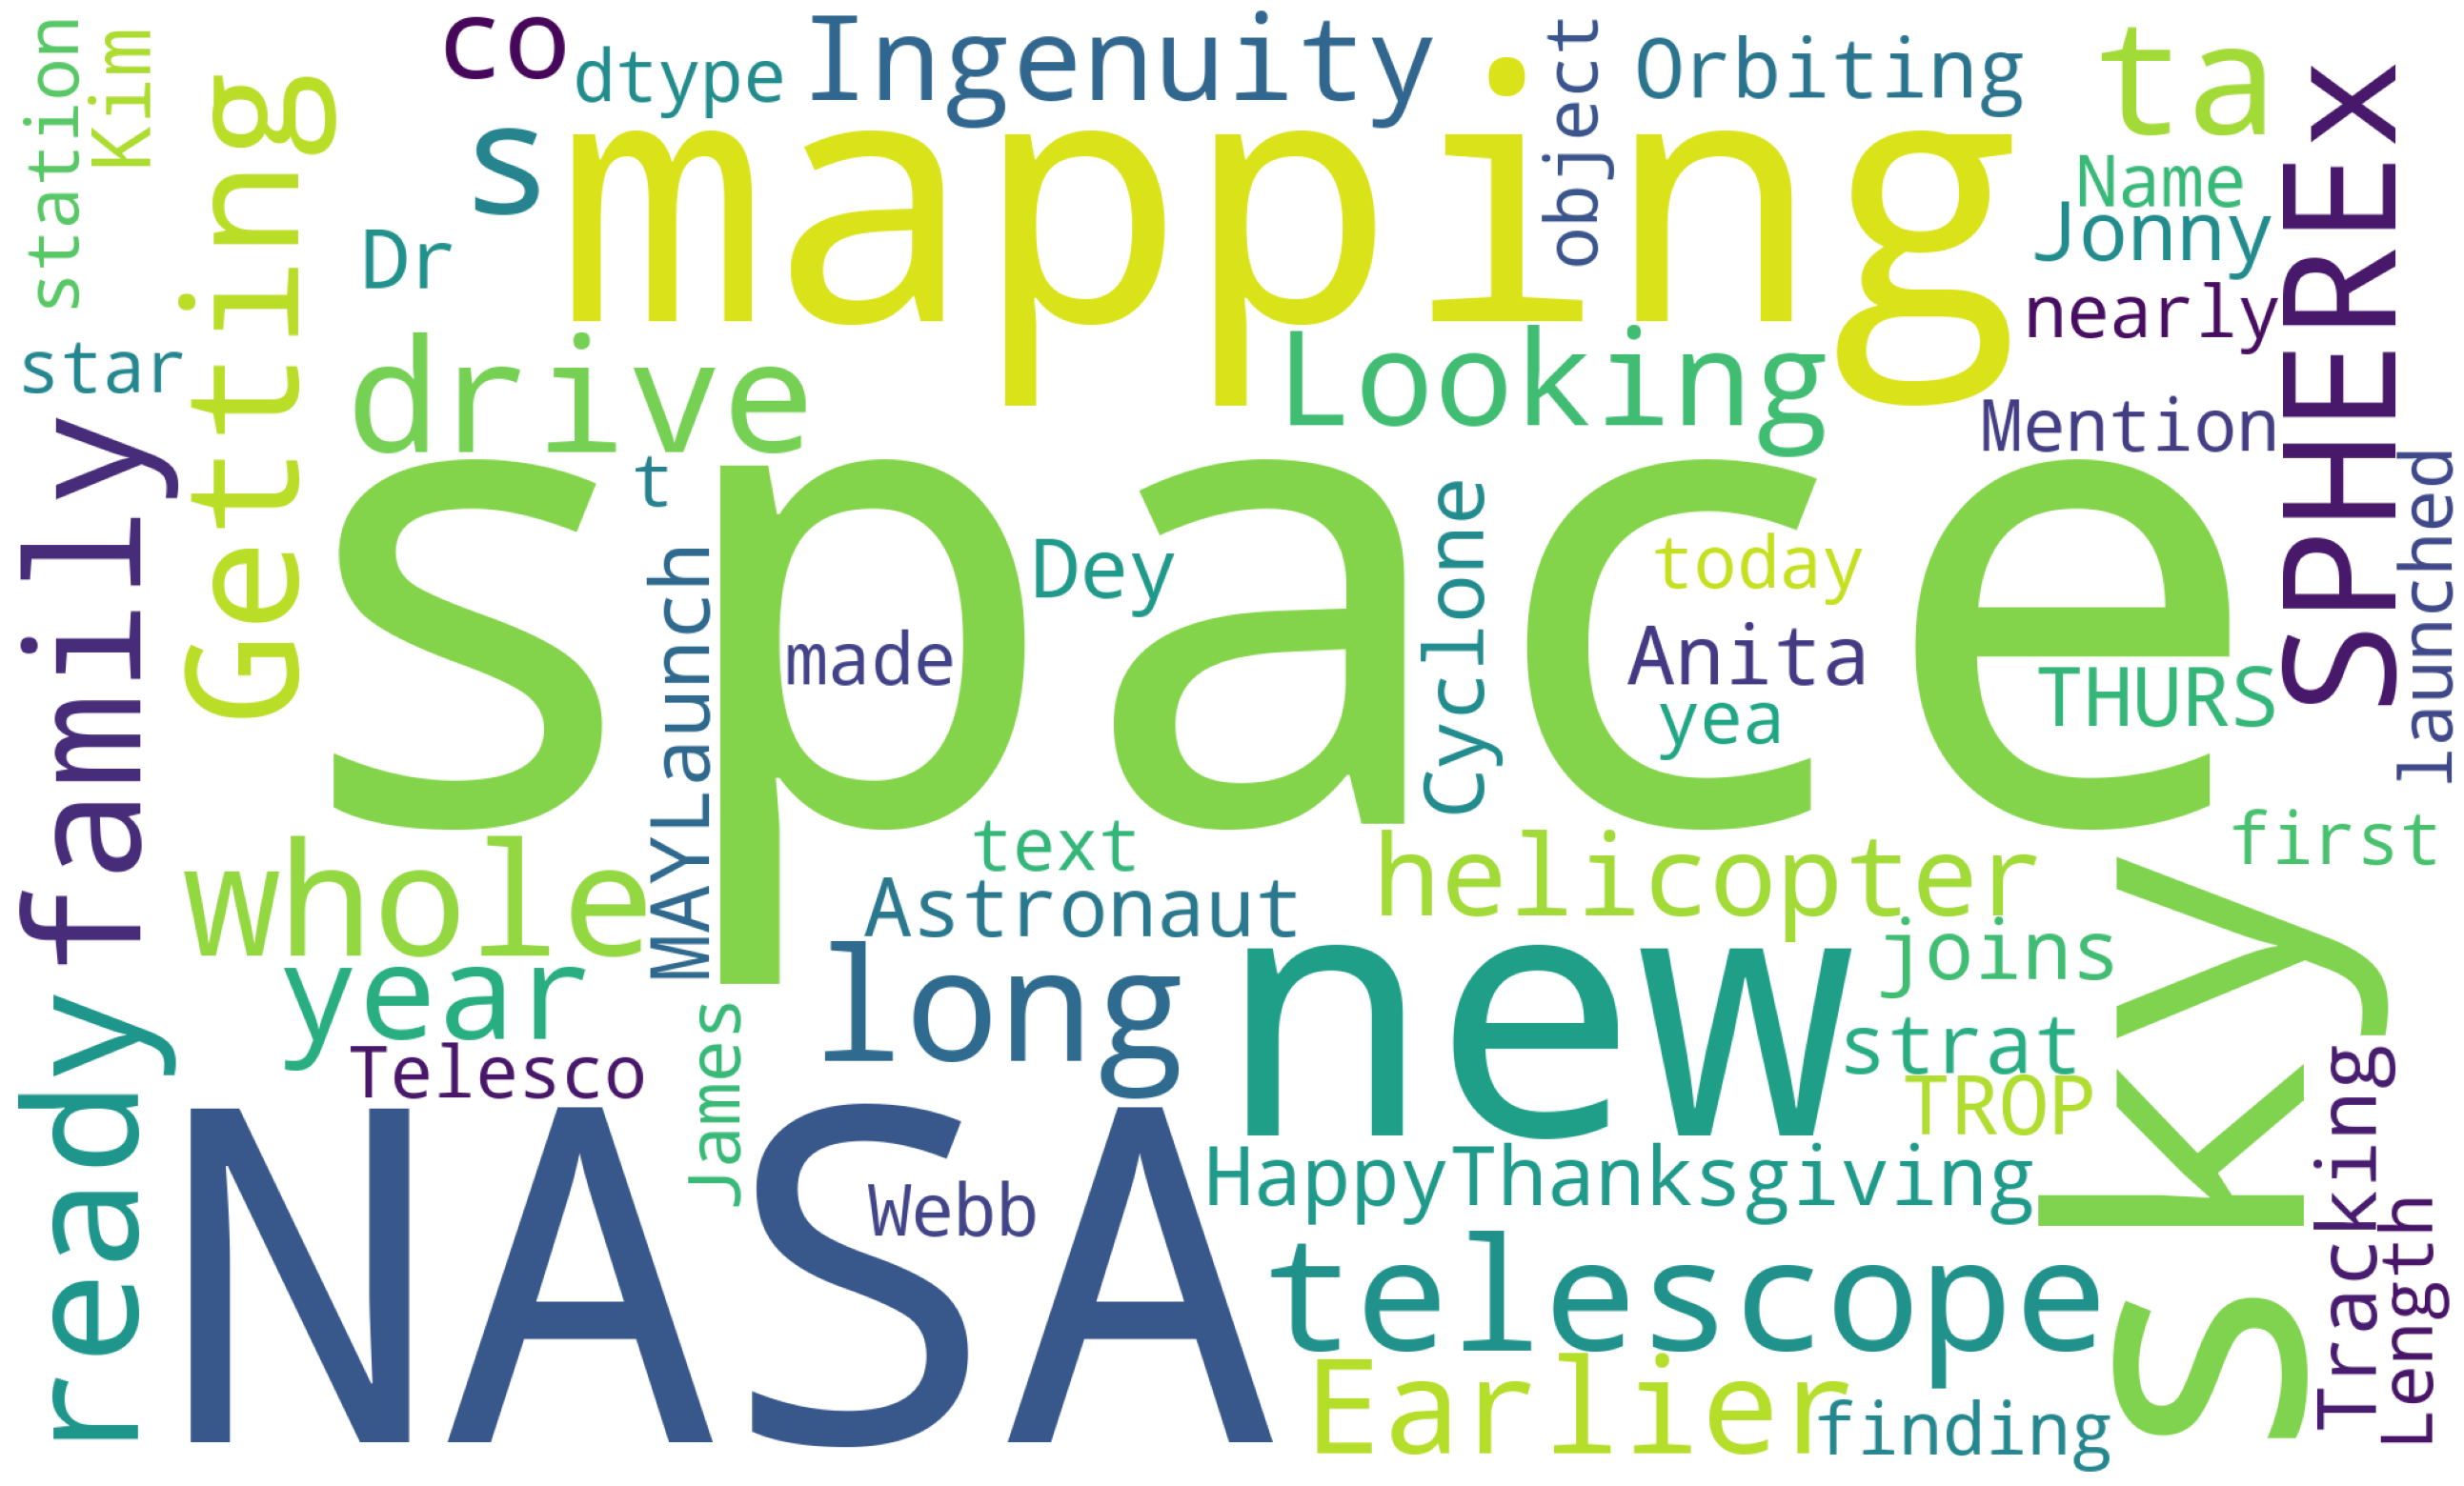

In [354]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(all_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Share's content analysis

In [355]:
import re
links_list = NASA['links'].tolist()
all_links = [list(eval(links)) for links in links_list]
url_list = []
for links in all_links:
    for link in links:
        url_list.append(link['link'])



In [356]:
for url in url_list:
    pattern = '\/\S*\?'
    match = re.search(pattern=pattern,string= url)

In [357]:
hashtags = []
pages = []
for url in url_list:
    pattern = '\/\S*\?'
    match = re.search(pattern=pattern,string= url)
    result = match.group()
    if result[0:1] == '//':
        continue
    elif 'hashtag' in result:
        hashtags.append(result[9:-1])
    elif result.count('/') == 1 and result != '/story.php?':
        pages.append(result[1:-1])


#### hashtag

In [358]:
full_hashtag = ' '.join(hashtags)


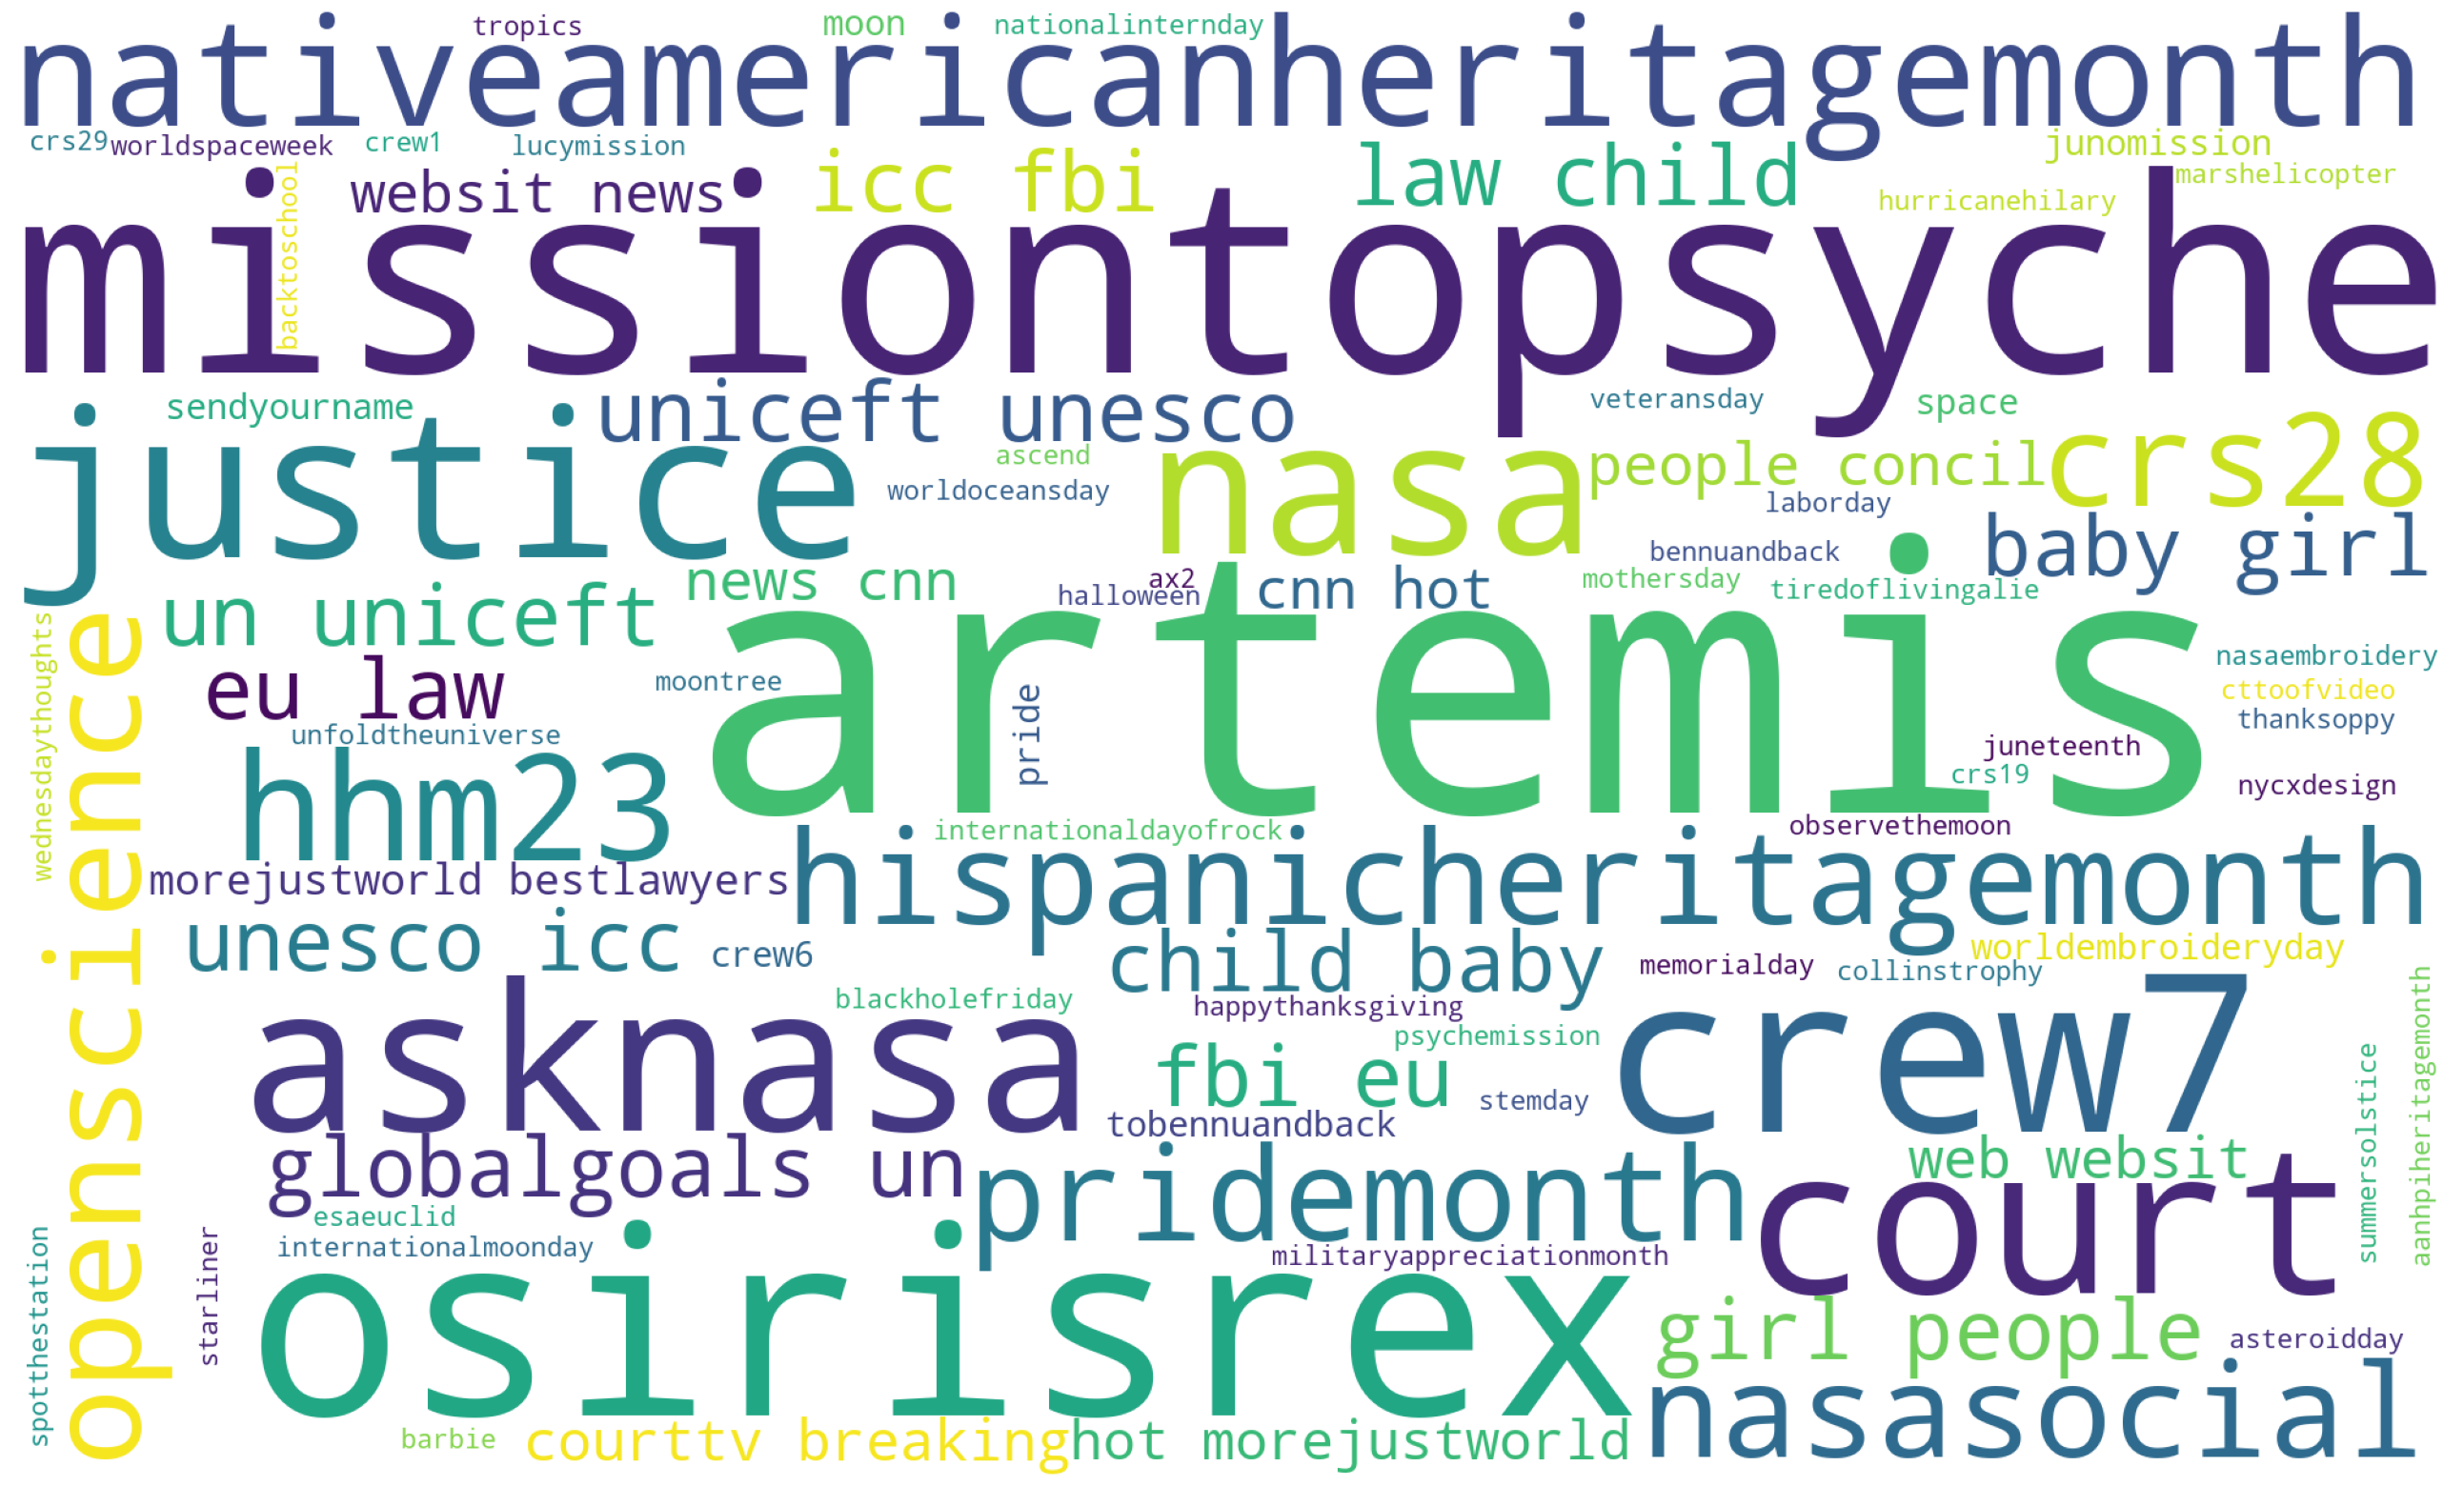

In [359]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(full_hashtag)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Artemis
OrisisRex
Justice
nasa
MissionToPsyche
court
crew7
asknasa

#### pages

In [360]:
pages = pd.Series(pages).unique()
pd.Series(pages).to_csv('Data/pages.csv', index=False)

In [361]:
pages_info = pd.read_csv('Data/pages_info.csv')
pages_info.head()

Unnamed: 0  Friend_count  Follower_count  Following_count  \
0            0           NaN             NaN              1.0   
1            1           NaN             NaN             30.0   
2            2           NaN             NaN             58.0   
3            3           NaN             NaN             34.0   
4            4           NaN             NaN             58.0   
5            5           NaN             NaN             65.0   
6            6           NaN             NaN             67.0   
7            7           NaN             NaN              NaN   
8            8           NaN             NaN              NaN   
9            9           NaN             NaN              NaN   
10          10           NaN             NaN              NaN   
11          11           NaN             NaN              NaN   
12          12           NaN             NaN              NaN   
13          13           NaN             NaN              NaN   
14          14           NaN             NaN              NaN   
15          15           NaN             NaN              NaN   
16          16           NaN             NaN              NaN   
17          17           NaN             NaN              NaN   
18          18           NaN             NaN              NaN   
19          19           NaN             NaN              NaN   
20          20           NaN             NaN              NaN   
21          21           NaN             NaN              NaN   
22          22           NaN             NaN              NaN   
23          23           NaN             NaN              NaN   
24          24           NaN             NaN              NaN   
25          25           NaN             NaN              NaN   
26          26           NaN             NaN              NaN   
27          27           NaN             NaN              NaN   
28          28           NaN             NaN              NaN   
29          29           NaN             NaN              NaN   
30          30           NaN             NaN              NaN   
31          31           NaN             NaN              NaN   
32          32           NaN             NaN              NaN   
33          33           NaN             NaN              NaN   
34          34           NaN             NaN              NaN   
35          35           NaN             NaN              NaN   
36          36           NaN             NaN              NaN   
37          37           NaN             NaN              NaN   
38          38           NaN             NaN              NaN   
39          39           NaN             NaN              NaN   
40          40           NaN             NaN              NaN   
41          41           NaN             NaN              NaN   
42          42           NaN             NaN              NaN   
43          43           NaN             NaN              NaN   
44          44           NaN             NaN              NaN   
45          45           NaN             NaN              NaN   
46          46           NaN             NaN              NaN   
47          47           NaN             NaN              NaN   
48          48           NaN             NaN              NaN   

                                     cover_photo_text  \
0   Cover Photo: NASA's Perseverance Mars Rover's ...   
1   Cover Photo: "🌟 A star is born! \n \nBehind th...   
2   Cover Photo: International Space Station's photo.   
3   Cover Photo: NASA's Hubble Space Telescope's p...   
4               Cover Photo: NASA Astronauts's photo.   
5     Cover Photo: Chandra X-ray Observatory's photo.   
6   Cover Photo: NASA's Kennedy Space Center's photo.   
7                       Cover Photo: Spotify's photo.   
8   Cover Photo: "A rendering of NASA's Europa Cli...   
9   Cover Photo: NASA's Johnson Space Center's photo.   
10  Cover Photo: "Hello! This is ESA! Welcome to t...   
11  Cover Photo: "In the Mars Yard at NASAJPL with...   
12          

## Reactions analysis

In [362]:
reactions_list = NASA['reactions'].tolist()
all_reactions = [dict(eval(reactions)) for reactions in reactions_list]
all_reactions = pd.DataFrame(all_reactions)
all_reactions = all_reactions.fillna(0)
all_reactions.head()

like  love  haha  wow  care  sad  angry
0     637   113     5    2     7  0.0    0.0
1     817   235    10    6    14  0.0    0.0
2    3532   690   365   27    37  2.0    2.0
3    1219   270     9   34    17  1.0    1.0
4    2091   739    54   14    51  1.0    0.0
..    ...   ...   ...  ...   ...  ...    ...
333  1174   188    15    4    12  0.0    2.0
334   564    67     4    5     5  0.0    0.0
335  1860   245    29   66    16  1.0    1.0
336  1879   503    15   16    23  0.0    1.0
337  6493  1186    93   63    53  2.0    0.0

[338 rows x 7 columns]

In [363]:
all_reactions_sum = all_reactions.sum()
all_reactions_sum

like     1391931.0
love      586245.0
haha       30122.0
wow        65830.0
care       23300.0
sad         3489.0
angry       1202.0
dtype: float64

<AxesSubplot:>

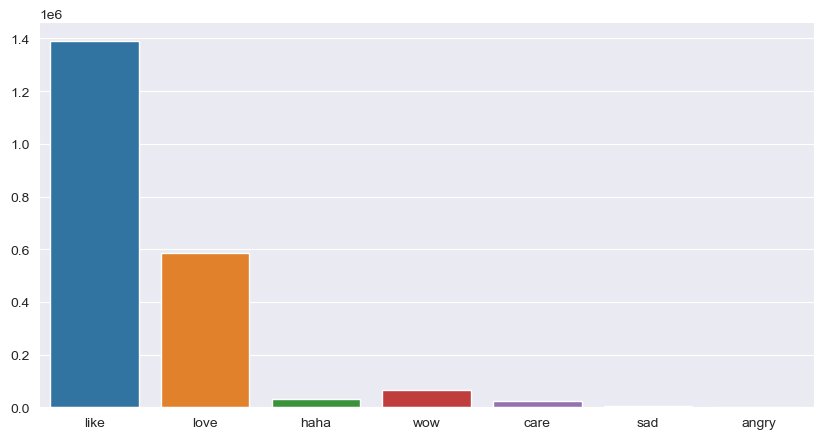

In [364]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=all_reactions_sum.index, y=all_reactions_sum.values)

## Comment analysis

In [365]:
import datetime
comments_list = NASA['comments_full'].to_list()
all_comments = []
for comments in comments_list:
    comments = list(eval(comments))
    for comment in comments:
        all_comments.append(comment)


I want to get all the commenter/replier and what they said


In [366]:
def get_user_comment(req_comment, dist):
    '''
    This function return all the comments and its replies information and append it to dist
    :param req_comment: A dist, the comment we need to extract
    :param dist: A list, the destination
    :return:
    '''
    if 'replies' in req_comment.keys():
        for reply in req_comment['replies']:
            get_user_comment(reply, dist)
    dist.append(dict({
        'commenter_id' : req_comment['commenter_id'],
        'comment_text': req_comment['comment_text']
    }))
    return

In [367]:
all_comments_replies = []
for comment in all_comments:
    get_user_comment(req_comment=comment, dist=all_comments_replies)

In [368]:
all_uid = [rep['commenter_id'] for rep in all_comments_replies]
pd.Series(all_uid).to_csv('Data/uid.csv', index=False)

all_comments_text = [rep['comment_text'] for rep in all_comments_replies]

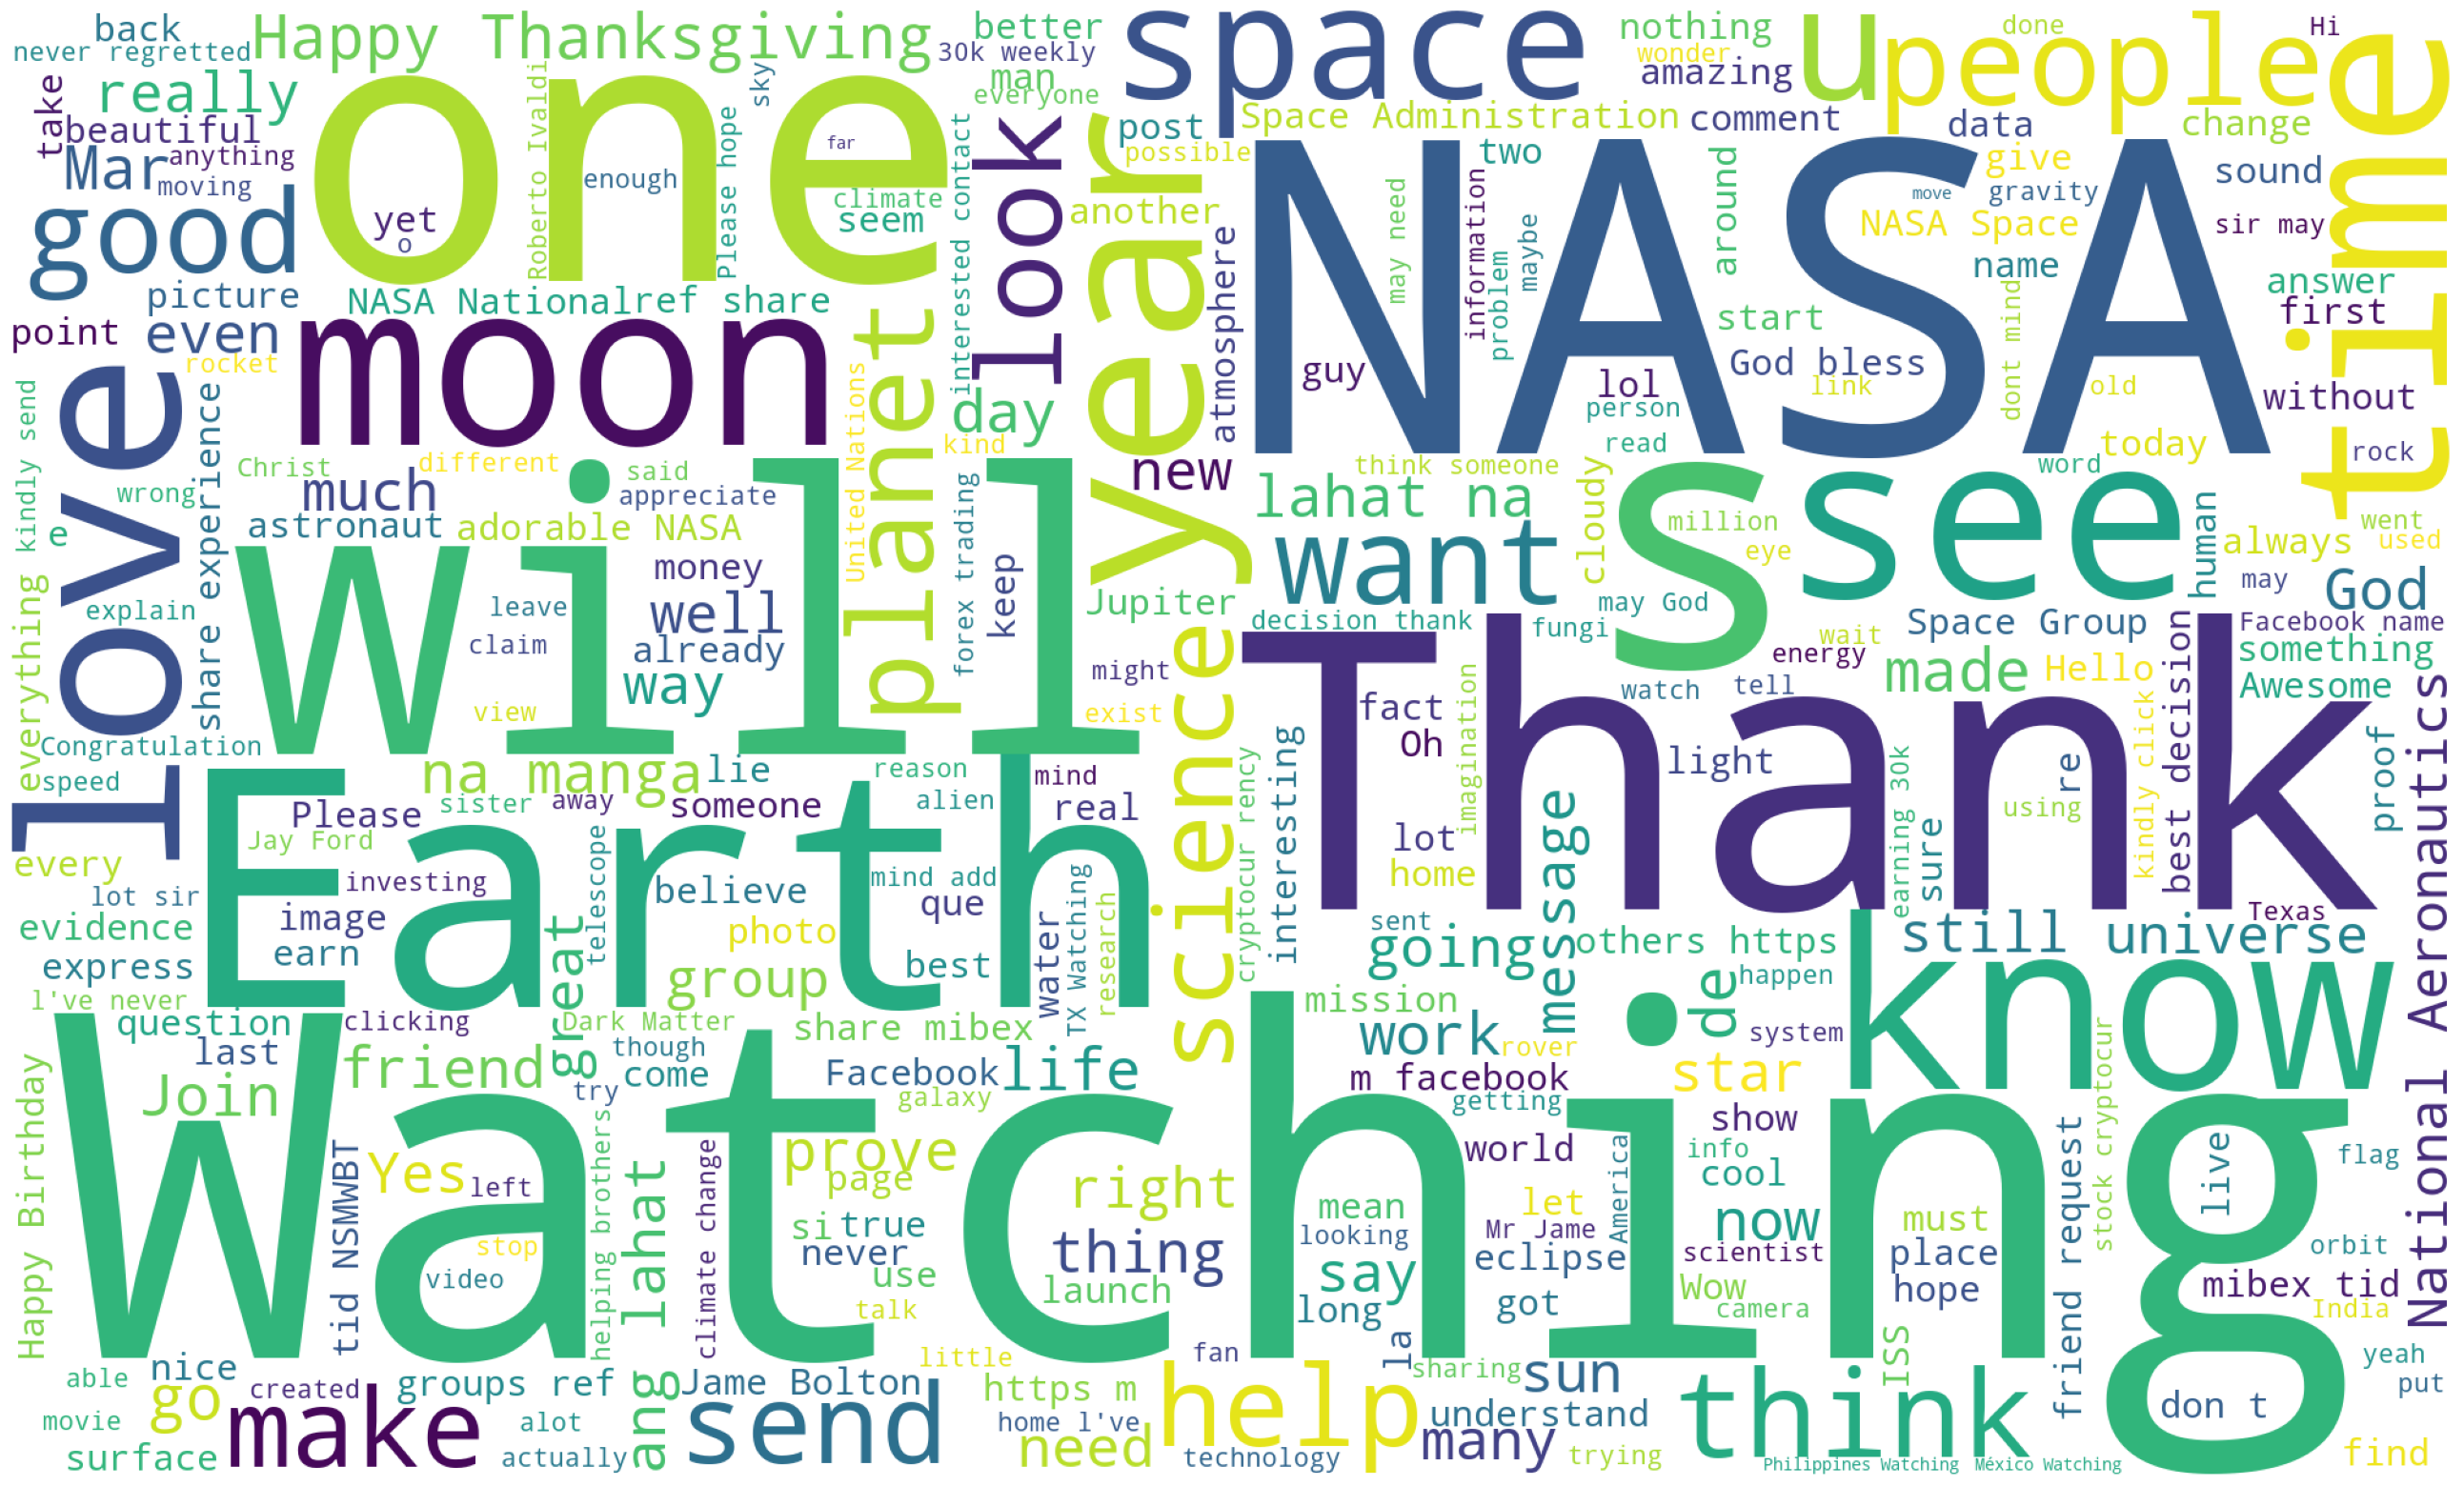

In [369]:
comment_join = ' '.join(all_comments_text)
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(comment_join)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [370]:
#%pip install langdetect

In [371]:
from langdetect import detect
all_language = []
for text in all_comments_text:
    try:
        all_language.append(detect(text))
    except Exception as e:
        all_language.append('other/none')

In [372]:
lang = pd.Series(all_language)
count = lang.value_counts()
count

en            6020
other/none     299
de             168
es             160
fr             117
tl              94
it              85
af              74
id              74
so              73
pt              60
nl              58
ar              54
tr              53
sv              50
ro              45
cy              45
sw              44
vi              43
no              38
ca              35
pl              35
et              33
da              32
fi              21
sl              18
hr              16
lt              15
hu              15
sk              13
sq              10
ko               9
th               8
cs               6
ur               6
lv               4
he               3
fa               3
mk               3
bg               3
ru               3
ne               2
ja               1
zh-cn            1
hi               1
el               1
dtype: int64

In [373]:
filered_lang = {}
other = 0
for lang in count.index:
    if count[lang] < 100 or lang == 'other/none':
        other += count[lang]
    else:
        filered_lang[lang] = count[lang]

filered_lang['other/none'] = other
filered_lang


{'en': 6020, 'de': 168, 'es': 160, 'fr': 117, 'other/none': 1486}

Text(0.5, 1.0, "Comment's language")

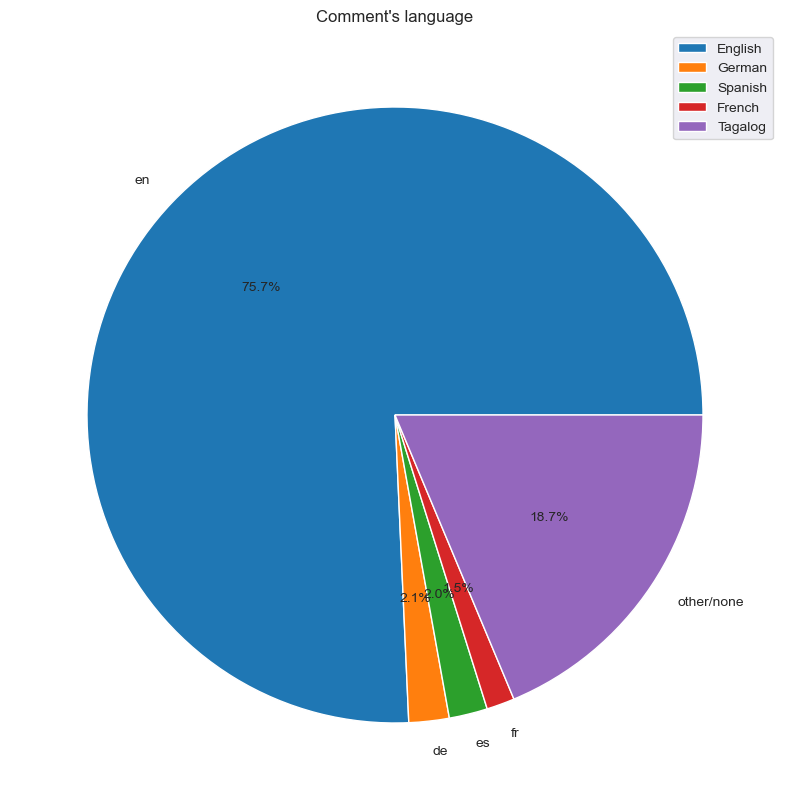

In [374]:
fig, ax = plt.subplots(figsize=(10,10))
filered_lang = pd.Series(filered_lang)
plt.pie(filered_lang, labels=list(filered_lang.keys()), autopct='%1.1f%%')
plt.legend(['English', 'German', 'Spanish', 'French', 'Tagalog', 'Others/None'])
plt.title('Comment\'s language')